In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
%cd /content/gdrive/My\ Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [0]:
from image_segmentation_keras.keras_segmentation.models.unet import vgg_unet
import matplotlib.pyplot as plt

In [14]:
from image_segmentation_keras.keras_segmentation.predict import predict_multiple


predict_multiple( 
	checkpoints_path="checkpoints/vgg_unet_720_epoch20", 
	inp_dir="split/images_prepped_test/", 
	out_dir="output/vgg_unet_720_epoch20/" 
)

  0%|          | 0/121 [00:00<?, ?it/s]

loaded weights  checkpoints/vgg_unet_720_epoch20.19


100%|██████████| 121/121 [01:08<00:00,  1.76it/s]


[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
       

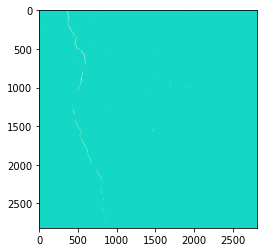

True

In [15]:
import numpy as np
from PIL import Image
import time
import glob
import cv2
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

crack = []
files = sorted(glob.glob("./output/vgg_unet_720_epoch20/*.png"),key=numericalSort)
for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        data = np.asarray(image)
        crack.append(data)
crack = np.array(crack)
crack = crack.astype('float32')
crack = crack / 255.0

size = 256
img = 3024
v_size = img // size * size
h_size = img // size * size 
#img = img[:v_size, :h_size]
v_split = img // size
h_split = img // size
k = 0

for i in range(v_split):
        for j in range(h_split):
            if k >= len(crack):break
            im = crack[k]
            if j == 0:im1 = im
            else:im1 = np.hstack((im1,im))
            k += 1
        if i == 0:im2 = im1
        else:im2 = np.vstack((im2,im1))
        if k>= len(crack):break

plt.imshow(im2)
plt.show()

im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
im2 = im2 * 255
im2 = im2.astype(np.uint8)

cv2.imwrite('./output/vgg_unet_720_epoch20_result.png',im2)

In [16]:
"""
from image_segmentation_keras.keras_segmentation.predict import evaluate
evaluate(
		checkpoints_path="checkpoints/vgg_unet_720_epoch20",
		inp_images_dir="split/images_prepped_test/",
		annotations_dir="split/annotations_prepped_test/"
)
"""

'\nfrom image_segmentation_keras.keras_segmentation.predict import evaluate\nevaluate(\n\t\tcheckpoints_path="checkpoints/vgg_unet_720_epoch20",\n\t\tinp_images_dir="split/images_prepped_test/",\n\t\tannotations_dir="split/annotations_prepped_test/"\n)\n'